In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('plots/publication.mplstyle')
import math
import pandas as pd
from matplotlib import colors
import seaborn as sns
import IPython
from IPython.display import display, Math, Latex

from __future__ import annotations

import os
import warnings
from glob import glob
from pathlib import Path

warnings.filterwarnings("ignore")

pd.options.display.max_rows = 4000
pd.DataFrame._repr_html_ = pd.DataFrame._repr_latex_

In [7]:
def print_name(s):
    return rf'${s}$'

def b_g(s):
    cm=sns.light_palette("#a275ac", as_cmap=True)
    max_val = max(s.max(), abs(s.min()))
    norm = colors.Normalize(0.1,0.5)
    normed = norm(abs(s.values))
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cm)(normed)]
    return ['background-color: %s' % color for color in c]

In [8]:
def get_results(datafilename,errfilename,test_keys=[]):
    try:
        full_dict=pd.read_csv(datafilename)
        results=pd.read_csv(errfilename)
    except:
        print('Database not found')
        return
    return full_dict,results

def get_root(root):
    
    selected=False

    while not selected:
        PathDict={}
        i=0
        PathDict[i]=root
        for dirpath in Path(root).glob('*/'):
            if dirpath.is_dir():
                i+=1
                PathDict[i]=dirpath
        if i==0:
            break
        [print(key,PathDict[key]) for key in PathDict.keys()]
        print('-----',flush=True)
        selection=int(input('Choose folder:'))
        if str(PathDict[selection]).split('/')[-1]=='results':
            selected=True
        else:
            root=str(PathDict[selection])

    return root

In [9]:
val_keys=['a','b','c','alpha','beta','gamma','RMSD']
error_keys=['ID','name','num_atoms']+val_keys+[f'{rem} {alt}' for rem in ['Space Group','density'] for alt in ['Original','Relaxed']]+['total_electrons','time','folder','URL']

root='.'
root=get_root(root)

0 .
1 puntukas
2 OG_files
3 plots
4 results
5 cod-veriffy
6 Ovito Images
7 og_cod-verify
-----
0 cod-veriffy
1 cod-veriffy/pred-structures
2 cod-veriffy/.git
3 cod-veriffy/fix-structures
4 cod-veriffy/test-structures
5 cod-veriffy/check-structures
-----
0 cod-veriffy/pred-structures
1 cod-veriffy/pred-structures/problematic
2 cod-veriffy/pred-structures/metals-and-alloys
3 cod-veriffy/pred-structures/inorganics
4 cod-veriffy/pred-structures/organometallics
5 cod-veriffy/pred-structures/results
6 cod-veriffy/pred-structures/organics
-----


In [10]:
full_dict,error_dict=get_results(f'{root}/results/Database.csv',f'{root}/results/Error_results.csv')
errors=error_dict[error_keys]
errors=errors.set_index('ID').sort_values(by=['ID'])
errors["name"]=errors["name"].apply(print_name)
for val in ['num_atoms','total_electrons']:
    errors[val]=errors[val].apply(int)
error_dict=error_dict.set_index('ID')

error_table=errors.drop(columns=['URL']).style.\
    set_properties(subset=val_keys,**{'color': 'black'}).\
    apply(b_g,subset=val_keys)

error_table


,name,num_atoms,a,b,c,alpha,beta,gamma,RMSD,Space Group Original,Space Group Relaxed,density Original,density Relaxed,total_electrons,time,folder
ID,,,,,,,,,,,,,,,,
1100208,$$\rm P_{4}H_{68}C_{24}I_{4}N_{4} $$,104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P$2_1$$2_1$$2_1$,P$2_1$$2_1$$2_1$,1.457511,1.457511,512,0.066456,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organics
1100212,$$\rm Si_{4}P_{2}H_{66}C_{48}I_{6}N_{2} $$,128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P$2_1$,P$2_1$,1.642706,1.642706,772,0.073187,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organics
1100459,$$\rm P_{4}H_{64}C_{72}N_{4} $$,144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P$2_1$/c,P$2_1$/c,1.154412,1.154412,584,0.082326,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organics
1100664,$$\rm H_{96}C_{112}O_{16} $$,224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Pbca,Pbca,1.246225,1.246225,896,0.157557,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organics
1100666,$$\rm H_{40}C_{48}O_{16} $$,104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P$2_1$/c,P$2_1$/c,1.250928,1.250928,456,0.069304,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organics
1100963,$$\rm Fe_{2}P_{4}H_{60}C_{64}Cl_{20} $$,150,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P$2_1$/c,P$2_1$/c,1.597718,1.597718,896,0.088764,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organometallics
1501721,$$\rm C_{10}H_{20}N_{4}S_{4} $$,38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,C2/c,C2/c,1.388957,1.388957,172,0.038285,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organics
1501738,$$\rm H_{32}C_{56}O_{4} $$,92,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P$2_1$/c,P$2_1$/c,1.293484,1.293484,400,0.061564,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organics
1502231,$$\rm Fe_{2}Si_{2}H_{48}C_{34}O_{14} $$,100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P$2_1$,P$2_1$,1.317203,1.317203,444,0.063972,/home/j21064js/Desktop/FTMC/COD_Project/cod-veriffy/pred-structures/tmp/pred/organometallics


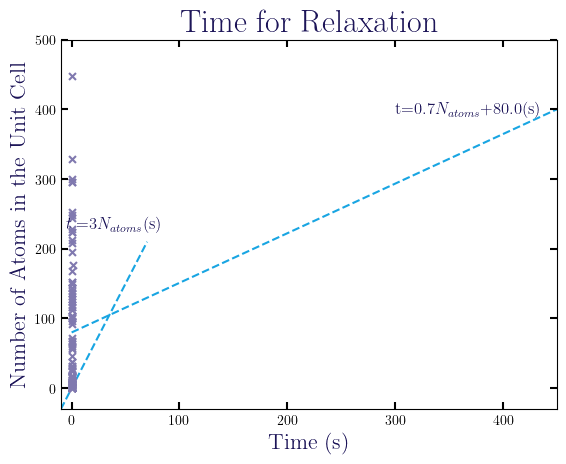

In [87]:
fontdict = {
    # 'family': 'serif',
    'color':  '#1D1558',
    'weight': 'demi',
    'size': 16,
    }


plt.scatter(errors['time'],errors['num_atoms'],marker='x',c='#8079AF')

l1=[[-10,70],[-30,210],[0,0]]
l2=[[0,450],[80,400],[0,0]]

plt.plot(l1[0],l1[1],color='#18A5E2',ls='--',zorder=0)
plt.plot(l2[0],l2[1],color='#18A5E2',ls='--',zorder=0)

plt.xlim(-10,450)
plt.axis()
plt.xlabel('Time (s)',fontdict=fontdict)

plt.ylim(-30,500)
plt.ylabel('Number of Atoms in the Unit Cell',fontdict=fontdict)

l1[2][0]=(l1[1][1]-l1[1][0])/abs(l1[0][1]-l1[0][0])
l2[2][0]=(l2[1][1]-l2[1][0])/abs(l2[0][1]-l2[0][0])
l1[2][1]=l1[1][1]-l1[2][0]*l1[0][1]
l2[2][1]=l2[1][1]-l2[2][0]*l2[0][1]

fontdict.update(
    {'size': 12}
    )

plt.text(-5,230,r'$t=$'+str(int(l1[2][0]))+r'$N_{atoms}$(s)',fontdict=fontdict)
plt.text(300,395,f't={np.round(l2[2][0],1)}'+r'$N_{atoms}+$'+f'{np.round(l2[2][1],3)}(s)',fontdict=fontdict)

fontdict.update(
    {'size': 23}
    )
plt.title('Time for Relaxation',fontdict=fontdict)

plot_name='num_atoms'

plt.savefig(f'plots/{plot_name}.pdf')
plt.savefig(f'plots/{plot_name}.png',transparent=True,dpi=400)

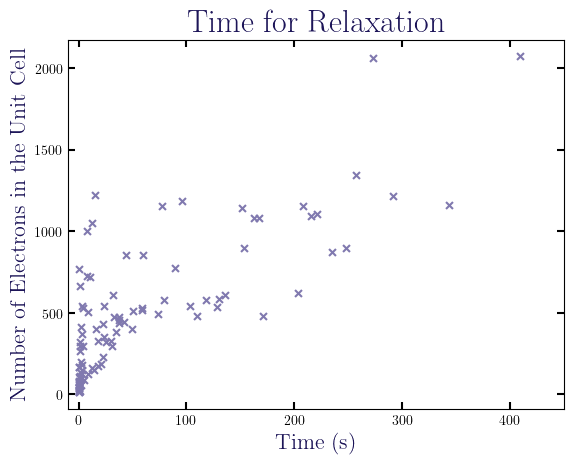

In [60]:
fontdict.update(
    {'size': 16}
    )

plt.scatter(errors['time'],errors['total_electrons'],marker='x',c='#8079AF')

plt.xlim(-10,450)
plt.axis()
plt.xlabel('Time (s)',fontdict=fontdict)

# plt.ylim(-10,500)
plt.ylabel('Number of Electrons in the Unit Cell',fontdict=fontdict)

fontdict.update(
    {'size': 23}
    )
plt.title('Time for Relaxation',fontdict=fontdict)

plot_name='total_electrons'

plt.savefig(f'plots/{plot_name}.pdf')
# plt.savefig(f'plots/{plot_name}.png',transparent=True,dpi=400)

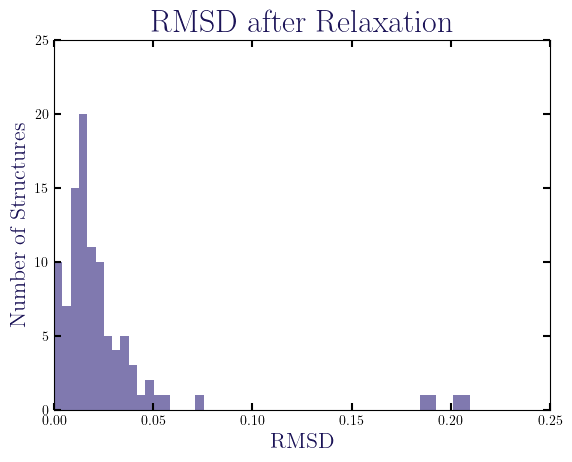

In [61]:
fontdict.update(
    {'size': 16}
    )

plt.hist(errors['RMSD'],bins=50,color='#8079AF')

plt.xlim(0,0.25)
plt.xlabel('RMSD',fontdict=fontdict)

plt.ylim(0,25)
plt.ylabel('Number of Structures',fontdict=fontdict)

fontdict.update({'size': 23})
plt.title('RMSD after Relaxation',fontdict=fontdict)

plot_name='error'

plt.savefig(f'plots/{plot_name}.pdf')
plt.savefig(f'plots/{plot_name}.png',transparent=True,dpi=400)